In [105]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warnings
import warnings

warnings.filterwarnings('ignore')

**NOTE:** I can't understand some of the variables fully what they mean, moreover, I don't have domain expert sitting next to me, so the info I get from the data can lack logic or sense

### Variables of Dataset:
* Balance
* Balance Frequency
* Purchases
* One-off Purchases
* Installment Purchases
* Cash Advance
* Purchases Frequency
* One-off Purchases Frequency
* Purchases Installments Frequency
* Cash Advance Frequency
* Cash Advance TRX
* Purchases TRX
* Credit Limit
* Payments
* Minimum Payments
* PRC Full payment
* Tenure

In [106]:
# Read Data
df = pd.read_csv('Customer_Data.csv')

In [107]:
# First 5 obs
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [108]:
# Info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [109]:
# Null Values in the data
df.isnull().sum()[df.isnull().sum() != 0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

In [110]:
# Minimum_Payments being null can mean that they have not paid anything for now and can consider it as 0
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

# Credit_Limit being NaN I can't explain, but since we have many observations we can omit 1 of them
df = df.dropna()

In [111]:
# Checking Nulls
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## EDA

In [112]:
# Revise Variables we have
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

<Axes: xlabel='BALANCE', ylabel='Count'>

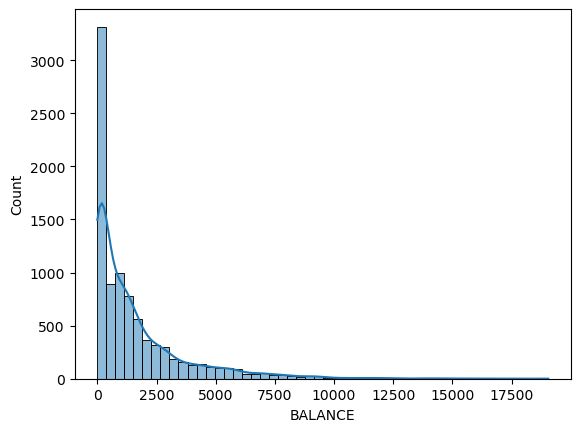

In [113]:
# BALANCE Distribution
sns.histplot(x = 'BALANCE', data = df, kde = True, bins = 50)

<Axes: ylabel='Density'>

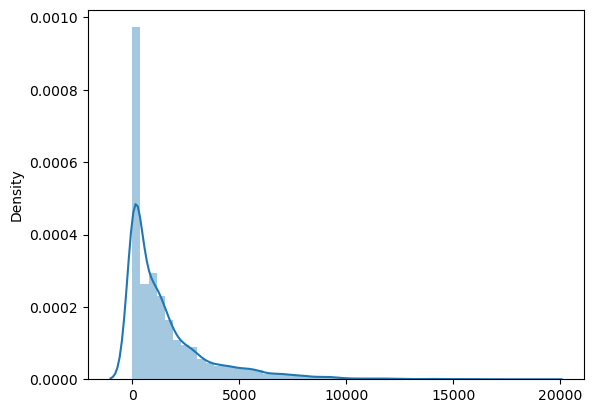

In [114]:
sns.distplot(x = df['BALANCE'])

Skewed to the right. Most of customers have 0 zero credit balance

In [115]:
# BALANCE OUTLIERS (Potentially Risky Customers)
df[df['BALANCE'] > 10000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
30,C10031,12136.21996,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,10,64,13000.0,4230.323491,3292.015030,0.0,12
124,C10130,14224.11541,1.0,0.00,0.00,0.00,4614.427403,0.000000,0.000000,0.000000,0.333333,9,0,19000.0,3066.614272,3406.258999,0.0,12
128,C10134,11167.23403,1.0,150.64,150.64,0.00,8362.154254,0.083333,0.083333,0.000000,0.500000,14,1,17000.0,2606.059389,2894.077159,0.0,12
138,C10144,19043.13856,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.0,12
143,C10149,10598.46777,1.0,2084.48,1300.48,784.00,0.000000,0.666667,0.416667,0.583333,0.000000,0,13,21500.0,3219.621433,3068.125648,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913,C16079,13777.37772,1.0,0.00,0.00,0.00,1675.249576,0.000000,0.000000,0.000000,0.666667,11,0,14500.0,3054.844697,3242.471295,0.0,12
6479,C16657,11304.51755,1.0,105.83,105.83,0.00,3451.163531,0.333333,0.333333,0.000000,0.583333,12,4,11500.0,1987.223626,5037.236980,0.0,12
6629,C16812,16259.44857,1.0,5024.68,3582.45,1442.23,328.698275,1.000000,0.833333,1.000000,0.083333,2,143,18000.0,4987.235359,5137.504664,0.0,12
7764,C17975,10856.48301,1.0,45.65,45.65,0.00,5096.886673,0.083333,0.083333,0.000000,0.250000,5,1,14500.0,2670.733732,2917.469357,0.0,12


<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Density'>

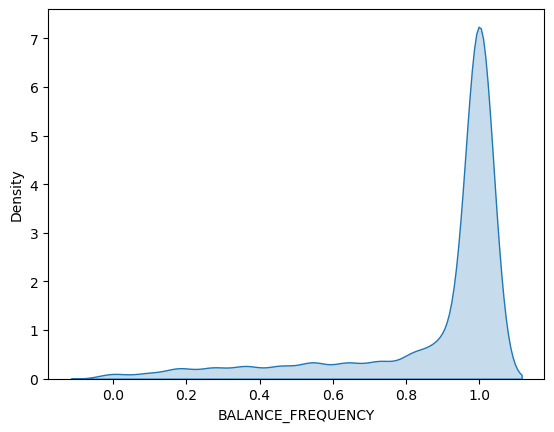

In [116]:
# Don't Really know what BALANCE_FREQUENCY means
sns.kdeplot(x = 'BALANCE_FREQUENCY', data = df, fill = True)

In [117]:
# BALANCE_FREQUENCY Outliers
df[df['BALANCE_FREQUENCY'] < 0.1]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
63,C10065,7.152356,0.090909,840.00,840.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,0.000000,0.0,12
99,C10104,0.000000,0.000000,0.00,0.0,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,0.000000,0.0,7
103,C10108,0.624240,0.090909,389.96,0.0,389.96,0.000000,1.000000,0.000000,1.000000,0.000000,0,31,4500.0,0.000000,0.000000,0.0,12
129,C10135,69.405545,0.090909,0.00,0.0,0.00,2799.714934,0.000000,0.000000,0.000000,0.083333,3,0,13000.0,0.000000,0.000000,0.0,12
181,C10187,0.000000,0.000000,23.00,0.0,23.00,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,0.000000,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,C18856,0.065402,0.090909,69.00,0.0,69.00,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,1500.0,506.688670,62.491042,0.0,12
8721,C18958,4.843351,0.090909,368.28,0.0,368.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1000.0,935.500113,29.977414,0.0,12
8751,C18990,0.546067,0.090909,228.00,0.0,228.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,238.695115,16.127297,0.0,12
8753,C18992,0.223351,0.090909,336.00,0.0,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,0.000000,0.0,12


<Axes: xlabel='PURCHASES', ylabel='Density'>

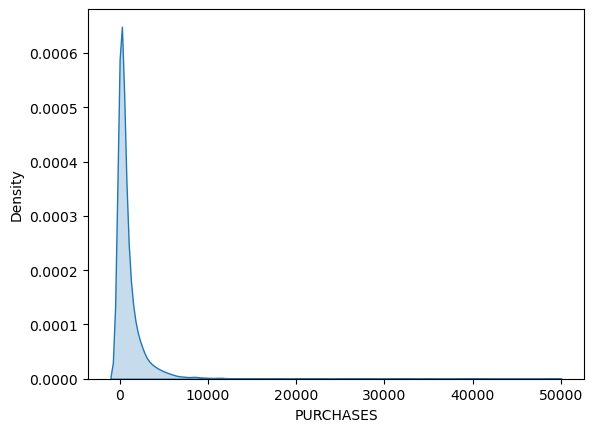

In [118]:
# Let's Observe PURCHASES
sns.kdeplot(x = 'PURCHASES', data = df, shade = True)

In [119]:
# Purchases Outliers (Spenders)
df[df['PURCHASES'] > 10000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
125,C10131,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,0,217,2800.0,11628.715570,2000.990921,0.000000,12
138,C10144,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.575830,18621.013310,0.000000,12
171,C10177,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,18,130,10500.0,10693.495850,347.641073,0.750000,12
204,C10212,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,0,123,7500.0,9423.715495,2925.275522,0.000000,12
220,C10229,9047.621884,1.000000,11188.62,6099.16,5089.46,0.000000,1.000000,0.750000,1.000000,0.000000,0,151,10000.0,11994.418150,8517.258683,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6640,C16823,348.342172,0.909091,11878.25,7958.96,3919.29,0.000000,1.000000,1.000000,0.416667,0.000000,0,103,6000.0,11845.841240,156.683560,0.600000,12
7046,C17237,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.014960,11853.796130,0.750000,12
7277,C17473,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,6,97,5500.0,12148.503510,188.413837,0.666667,12
7378,C17579,4228.417754,1.000000,11994.71,11994.71,0.00,496.521561,0.250000,0.250000,0.000000,0.083333,2,8,13450.0,508.797444,1725.645623,0.000000,12


In [120]:
# Since we have many customers with credit balance = 0 and some with purchases = 0, let's observe ones with both of them
df[(df['BALANCE'] == 0) & (df['PURCHASES'] == 0)] 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
99,C10104,0.0,0.0,0.0,0.0,0.0,89.849004,0.0,0.0,0.0,0.142857,1,0,3000.0,138.021428,0.0,0.0,7
654,C10680,0.0,0.0,0.0,0.0,0.0,310.888779,0.0,0.0,0.0,0.083333,1,0,9000.0,0.000000,0.0,0.0,12
4021,C14135,0.0,0.0,0.0,0.0,0.0,181.649790,0.0,0.0,0.0,0.083333,1,0,2500.0,1140.957855,0.0,0.0,12
4941,C15080,0.0,0.0,0.0,0.0,0.0,253.887233,0.0,0.0,0.0,0.111111,1,0,500.0,2437.932505,0.0,0.0,9
5107,C15252,0.0,0.0,0.0,0.0,0.0,465.571691,0.0,0.0,0.0,0.083333,1,0,3000.0,6112.512276,0.0,0.0,12
6052,C16223,0.0,0.0,0.0,0.0,0.0,72.388903,0.0,0.0,0.0,0.083333,1,0,3000.0,197.845282,0.0,0.0,12
6878,C17067,0.0,0.0,0.0,0.0,0.0,100.519930,0.0,0.0,0.0,0.083333,1,0,2000.0,0.000000,0.0,0.0,12
7075,C17267,0.0,0.0,0.0,0.0,0.0,147.241855,0.0,0.0,0.0,0.090909,1,0,500.0,667.921811,0.0,0.0,11


They are potentially new customers

<Axes: xlabel='PURCHASES', ylabel='BALANCE'>

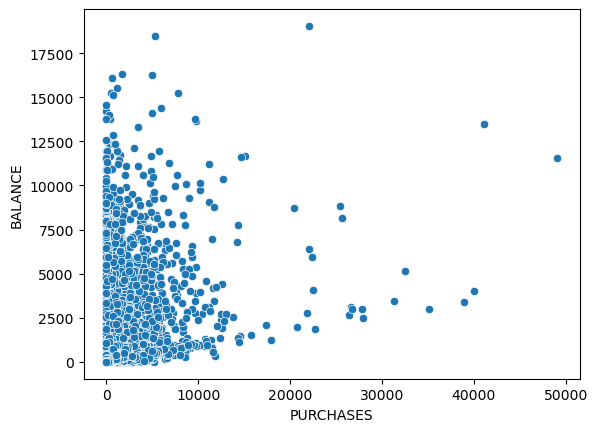

In [121]:
sns.scatterplot(x = 'PURCHASES', y = 'BALANCE', data = df)

In [122]:
df[['PURCHASES', 'BALANCE']].corr('pearson')

,PURCHASES,BALANCE
PURCHASES,1.00000,0.18123
BALANCE,0.18123,1.00000


Very low correlation or linear relationship between those variables

<Axes: xlabel='ONEOFF_PURCHASES', ylabel='Density'>

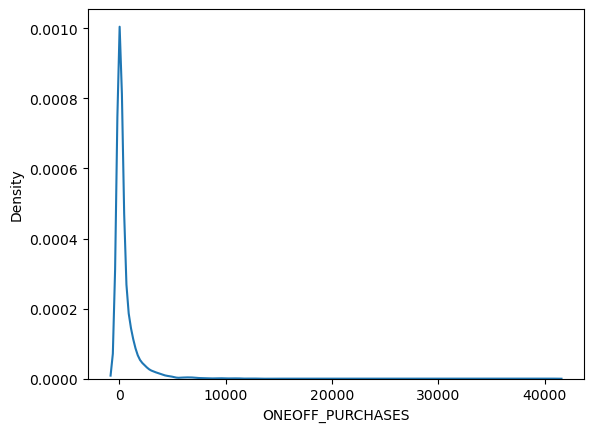

In [123]:
# Distribution of OneOff Purchases
sns.kdeplot(x = 'ONEOFF_PURCHASES', data = df)

<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='Density'>

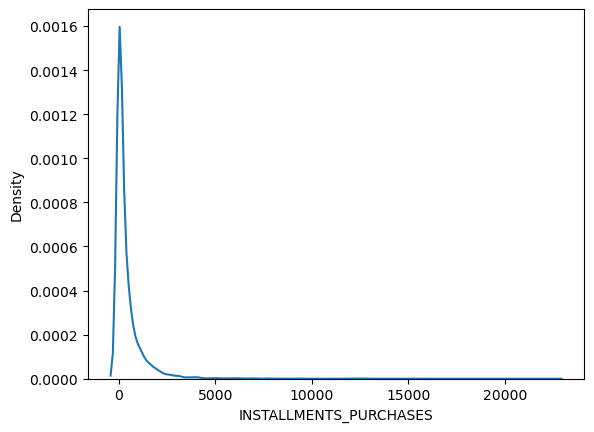

In [124]:
# Distribution of Installments Purchases
sns.kdeplot(x = 'INSTALLMENTS_PURCHASES', data = df)

From the plots above not many spenders we have in the dataset

<Axes: xlabel='CASH_ADVANCE', ylabel='Density'>

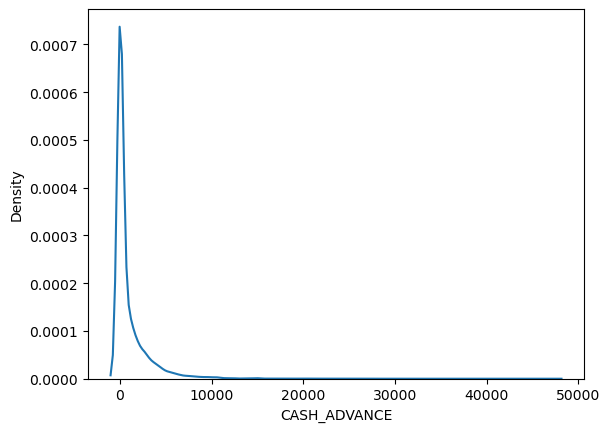

In [125]:
# Distribution of Cash Advances of customers
sns.kdeplot(data = df, x = 'CASH_ADVANCE')

<Axes: xlabel='CASH_ADVANCE', ylabel='BALANCE'>

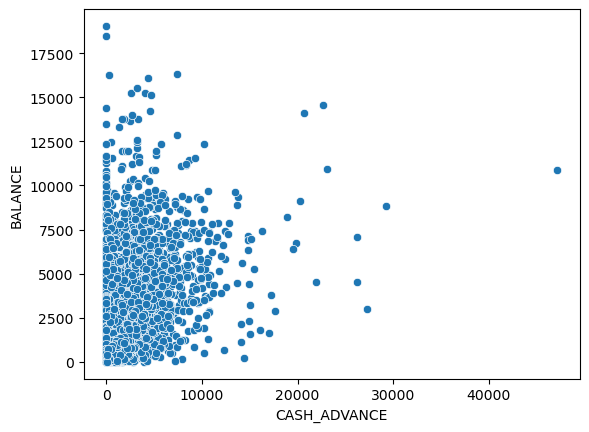

In [126]:
# Observing CASH_ADVANCE Variables relationship with BALANCE
sns.scatterplot(x = 'CASH_ADVANCE', y = 'BALANCE', data = df)

<Axes: xlabel='CASH_ADVANCE', ylabel='PURCHASES'>

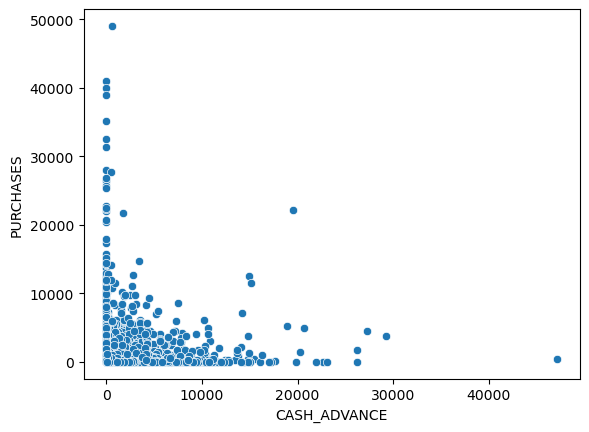

In [127]:
# Observing CASH_ADVANCE Variables relationship with PURCHASES
sns.scatterplot(x = 'CASH_ADVANCE', y = 'PURCHASES', data = df)

In [128]:
# Correlatins between these 3
df[["CASH_ADVANCE", "BALANCE", "PURCHASES"]].corr()

,CASH_ADVANCE,BALANCE,PURCHASES
CASH_ADVANCE,1.000000,0.496679,-0.051495
BALANCE,0.496679,1.000000,0.181230
PURCHASES,-0.051495,0.181230,1.000000


Pretty high correlation between CASH_ADVANCE and BALANCE

In [129]:
# Spearman Correlation
df[["CASH_ADVANCE", "BALANCE", "PURCHASES"]].corr('spearman')

,CASH_ADVANCE,BALANCE,PURCHASES
CASH_ADVANCE,1.000000,0.566016,-0.384757
BALANCE,0.566016,1.000000,0.006260
PURCHASES,-0.384757,0.006260,1.000000


Spearman is arguably better correlation metric to use, so we can say that CASH_ADVANCE is monotonicly related to these 2 variables

<Axes: xlabel='PURCHASES', ylabel='PURCHASES_FREQUENCY'>

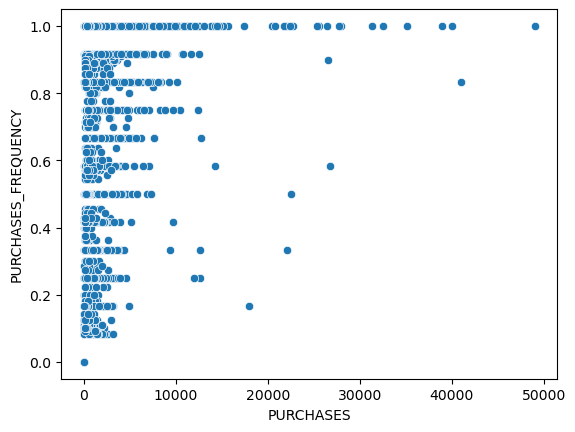

In [130]:
# Relationship of Purchases and its Frequency
sns.scatterplot(x = 'PURCHASES', y = 'PURCHASES_FREQUENCY', data = df)

In [131]:
# Correlation freq <--> purchases
df[['PURCHASES_FREQUENCY', 'PURCHASES']].corr('spearman')

,PURCHASES_FREQUENCY,PURCHASES
PURCHASES_FREQUENCY,1.000000,0.794502
PURCHASES,0.794502,1.000000


Logically they are correlated

<Axes: xlabel='CASH_ADVANCE', ylabel='CASH_ADVANCE_FREQUENCY'>

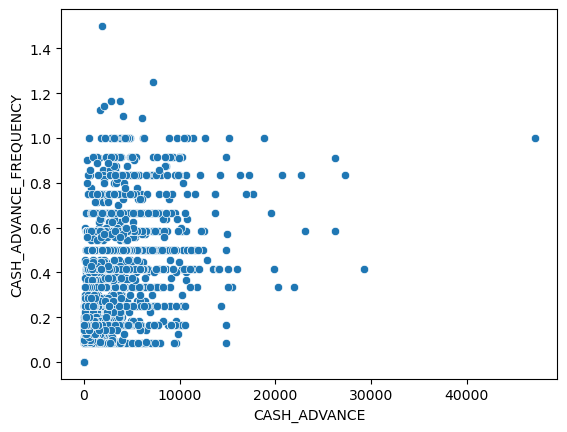

In [132]:
# Relationship in cash advances and its freq
sns.scatterplot(x = 'CASH_ADVANCE', y = 'CASH_ADVANCE_FREQUENCY', data = df)

In [133]:
# Correlation of the above vars
df[['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY']].corr('spearman')

,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY
CASH_ADVANCE,1.000000,0.940773
CASH_ADVANCE_FREQUENCY,0.940773,1.000000


Logically too high again

In [134]:
# Revisit Columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [135]:
# Unique values of advance TRX, since its integer
df['CASH_ADVANCE_TRX'].unique()

array([  0,   4,   1,   3,   6,  13,   5,  16,  10,   2,  11,   7,  12,
        37,  27,  23,  21,  14,  40,   8,   9,  26,  15,  18,  28,  24,
        20,  17,  22,  31, 123,  52,  51,  62,  19,  25,  30,  29,  53,
        45,  43,  42, 107,  38,  56,  39,  32,  33,  50,  34,  63,  36,
       110,  47,  48,  71,  35,  93,  80,  44,  61,  46,  49,  69,  41],
      dtype=int64)

<Axes: ylabel='Density'>

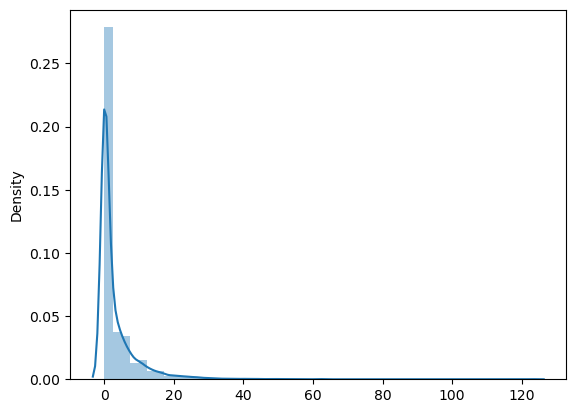

In [136]:
# Distributin of CASH_ADVANCE_TRX
sns.distplot(x = df['CASH_ADVANCE_TRX'])

<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

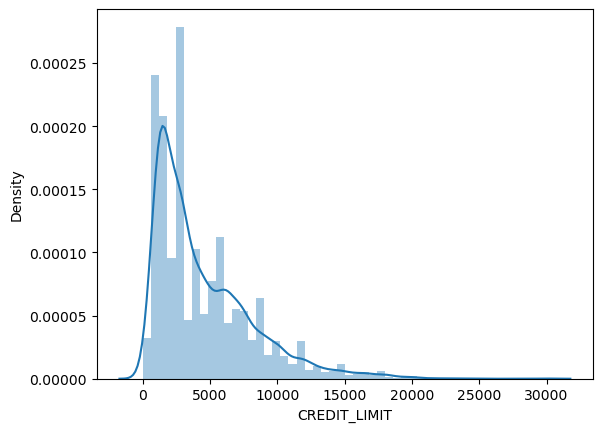

In [137]:
# Credit Limit Distribution
sns.distplot(df['CREDIT_LIMIT'])

<Axes: xlabel='PAYMENTS', ylabel='Density'>

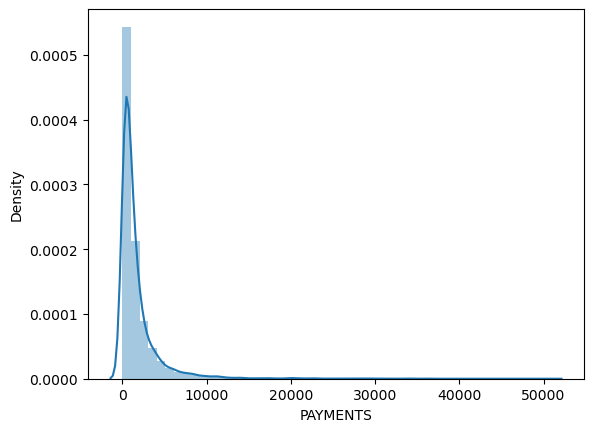

In [138]:
# Payments Distribution
sns.distplot(df['PAYMENTS'])

<Axes: xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

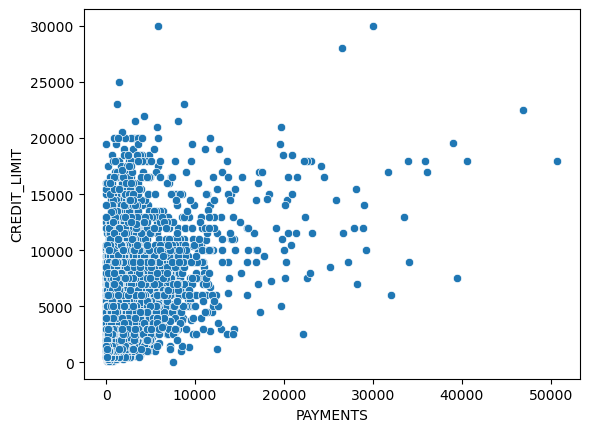

In [139]:
# Relationship Between PAYMENTS and CREDIT_LIMIT
sns.scatterplot(x = 'PAYMENTS', y = 'CREDIT_LIMIT', data = df)

In [140]:
df[['PAYMENTS', 'CREDIT_LIMIT']].corr('spearman')

,PAYMENTS,CREDIT_LIMIT
PAYMENTS,1.000000,0.449439
CREDIT_LIMIT,0.449439,1.000000


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

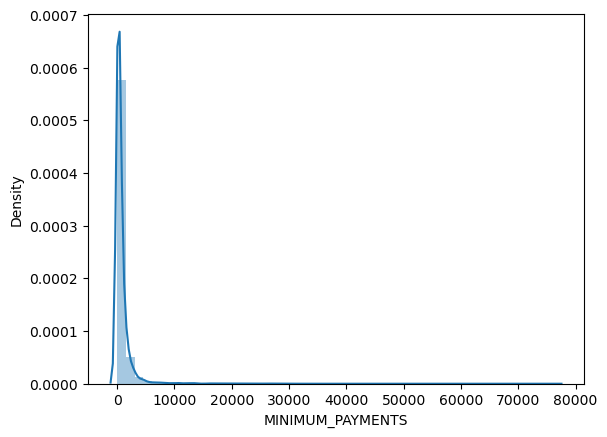

In [141]:
# Minimum Payments
sns.distplot(df['MINIMUM_PAYMENTS'])

<Axes: xlabel='PAYMENTS', ylabel='MINIMUM_PAYMENTS'>

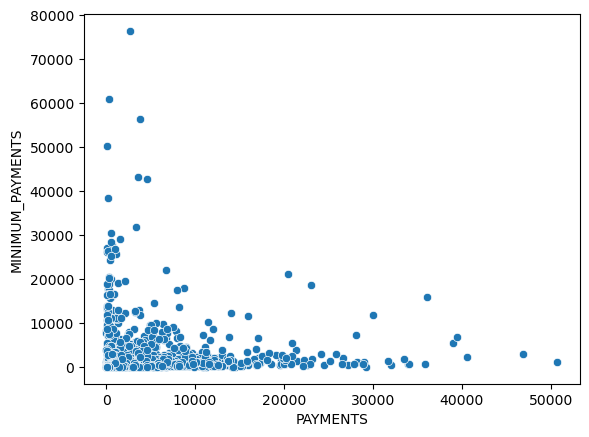

In [142]:
# Payments <=> Minimum Payments
sns.scatterplot(data = df, x = 'PAYMENTS', y = 'MINIMUM_PAYMENTS')

In [143]:
# Tenure
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

<Axes: xlabel='TENURE', ylabel='count'>

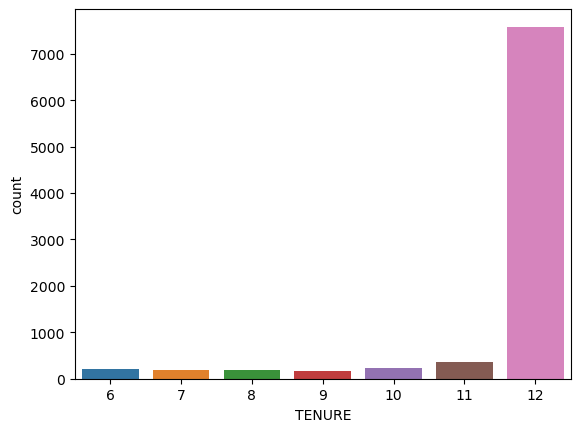

In [144]:
# Countplot of TENURE categories
sns.countplot(x = 'TENURE', data = df)

Dominated by TENURE = 12

<Axes: >

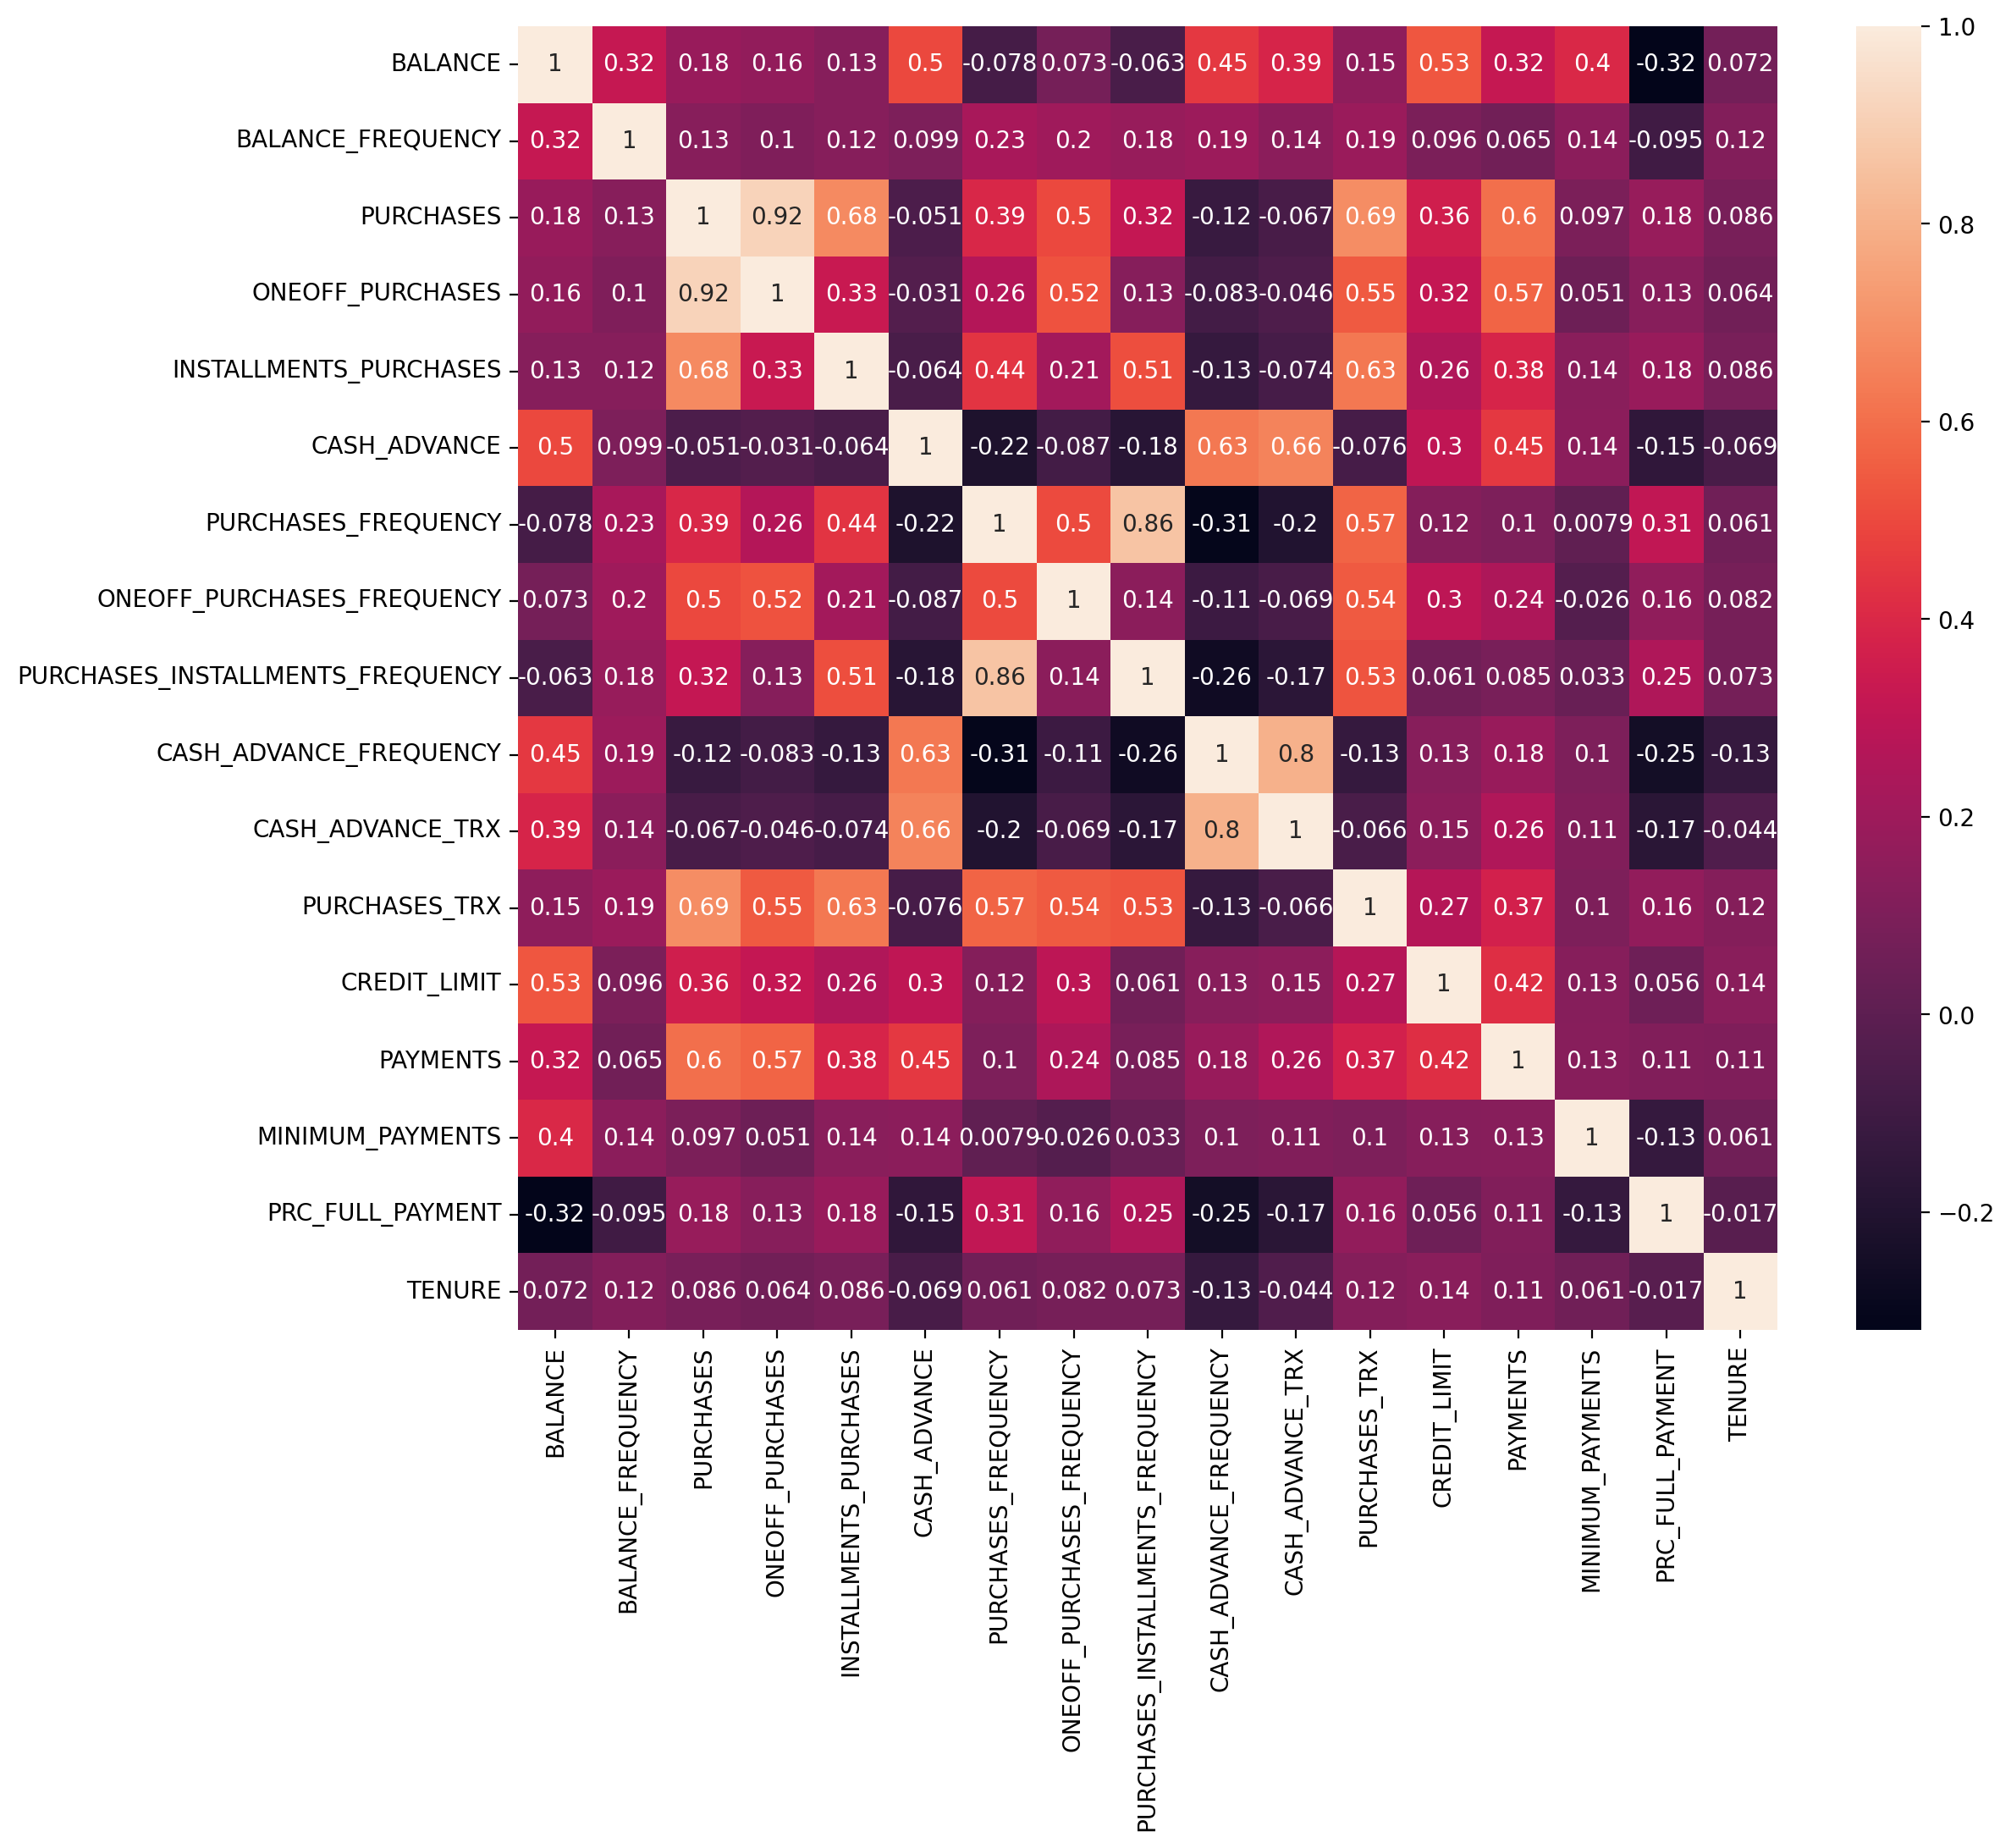

In [145]:
# Correlation Plot
plt.figure(figsize = (12,10), dpi = 200)
sns.heatmap(df.select_dtypes(exclude = object).corr(), annot = True)

## PCA

In [146]:
# Libraries

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [147]:
# Necessary tools for our analysis

scaler = StandardScaler()
X = df.drop('CUST_ID', axis = 1)
pca = PCA(n_components = 2)

In [153]:
# Scale data and use the model

X_scaled = scaler.fit_transform(X)
pc_results = pca.fit_transform(X_scaled)

In [154]:
# Sum of explainde variances

pca.explained_variance_ratio_.sum()

0.47619682651326534

In [150]:
# Loadings

pca.components_

array([[ 0.10200099,  0.12059464,  0.41154974,  0.34631978,  0.3367538 ,
        -0.02260353,  0.32110072,  0.29442286,  0.27438384, -0.08833174,
        -0.04793433,  0.39057031,  0.21200936,  0.26658172,  0.06481972,
         0.13169479,  0.08091273],
       [ 0.40374789,  0.13183939,  0.03956679,  0.06148486, -0.01946314,
         0.43889801, -0.19132382, -0.01884265, -0.17899322,  0.4341375 ,
         0.41958012, -0.0205126 ,  0.23770814,  0.2563592 ,  0.17012089,
        -0.19005945, -0.00434518]])

In [157]:
# Dataframe of Principal Components
pf = pd.DataFrame({'PC1': pc_results[:,0],
                  'PC2' : pc_results[:,1]})

In [158]:
pf

,PC1,PC2
0,-1.684484,-1.070216
1,-1.132564,2.510222
2,0.968929,-0.383444
3,-0.897248,-0.017765
4,-1.600519,-0.681374
...,...,...
8944,-0.363620,-2.011356
8945,-0.590124,-1.696260
8946,-0.929905,-1.806108
8947,-2.338060,-0.650937


<Axes: xlabel='PC1', ylabel='PC2'>

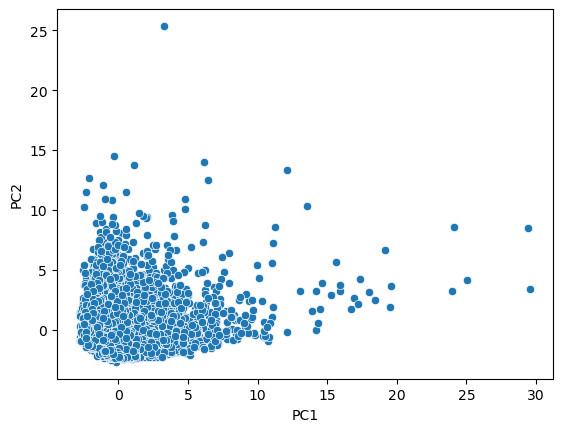

In [160]:
# Plot of principal components
sns.scatterplot(x = 'PC1', y = 'PC2', data = pf)

In [185]:
# Loading Vectors for the components
loading_vector_1 = pca.components_[0]
loading_vector_2 = pca.components_[1]

In [188]:
# Create Loading Dataframe
loadings = pd.DataFrame({'phi1' : loading_vector_1,
                         'phi2' : loading_vector_2})
loadings

,phi1,phi2
0,0.102001,0.403748
1,0.120594,0.131839
2,0.411550,0.039567
3,0.346320,0.061485
4,0.336754,-0.019463
5,-0.022603,0.438898
6,0.321101,-0.191324
7,0.294423,-0.018842
8,0.274384,-0.178993
9,-0.088332,0.434137


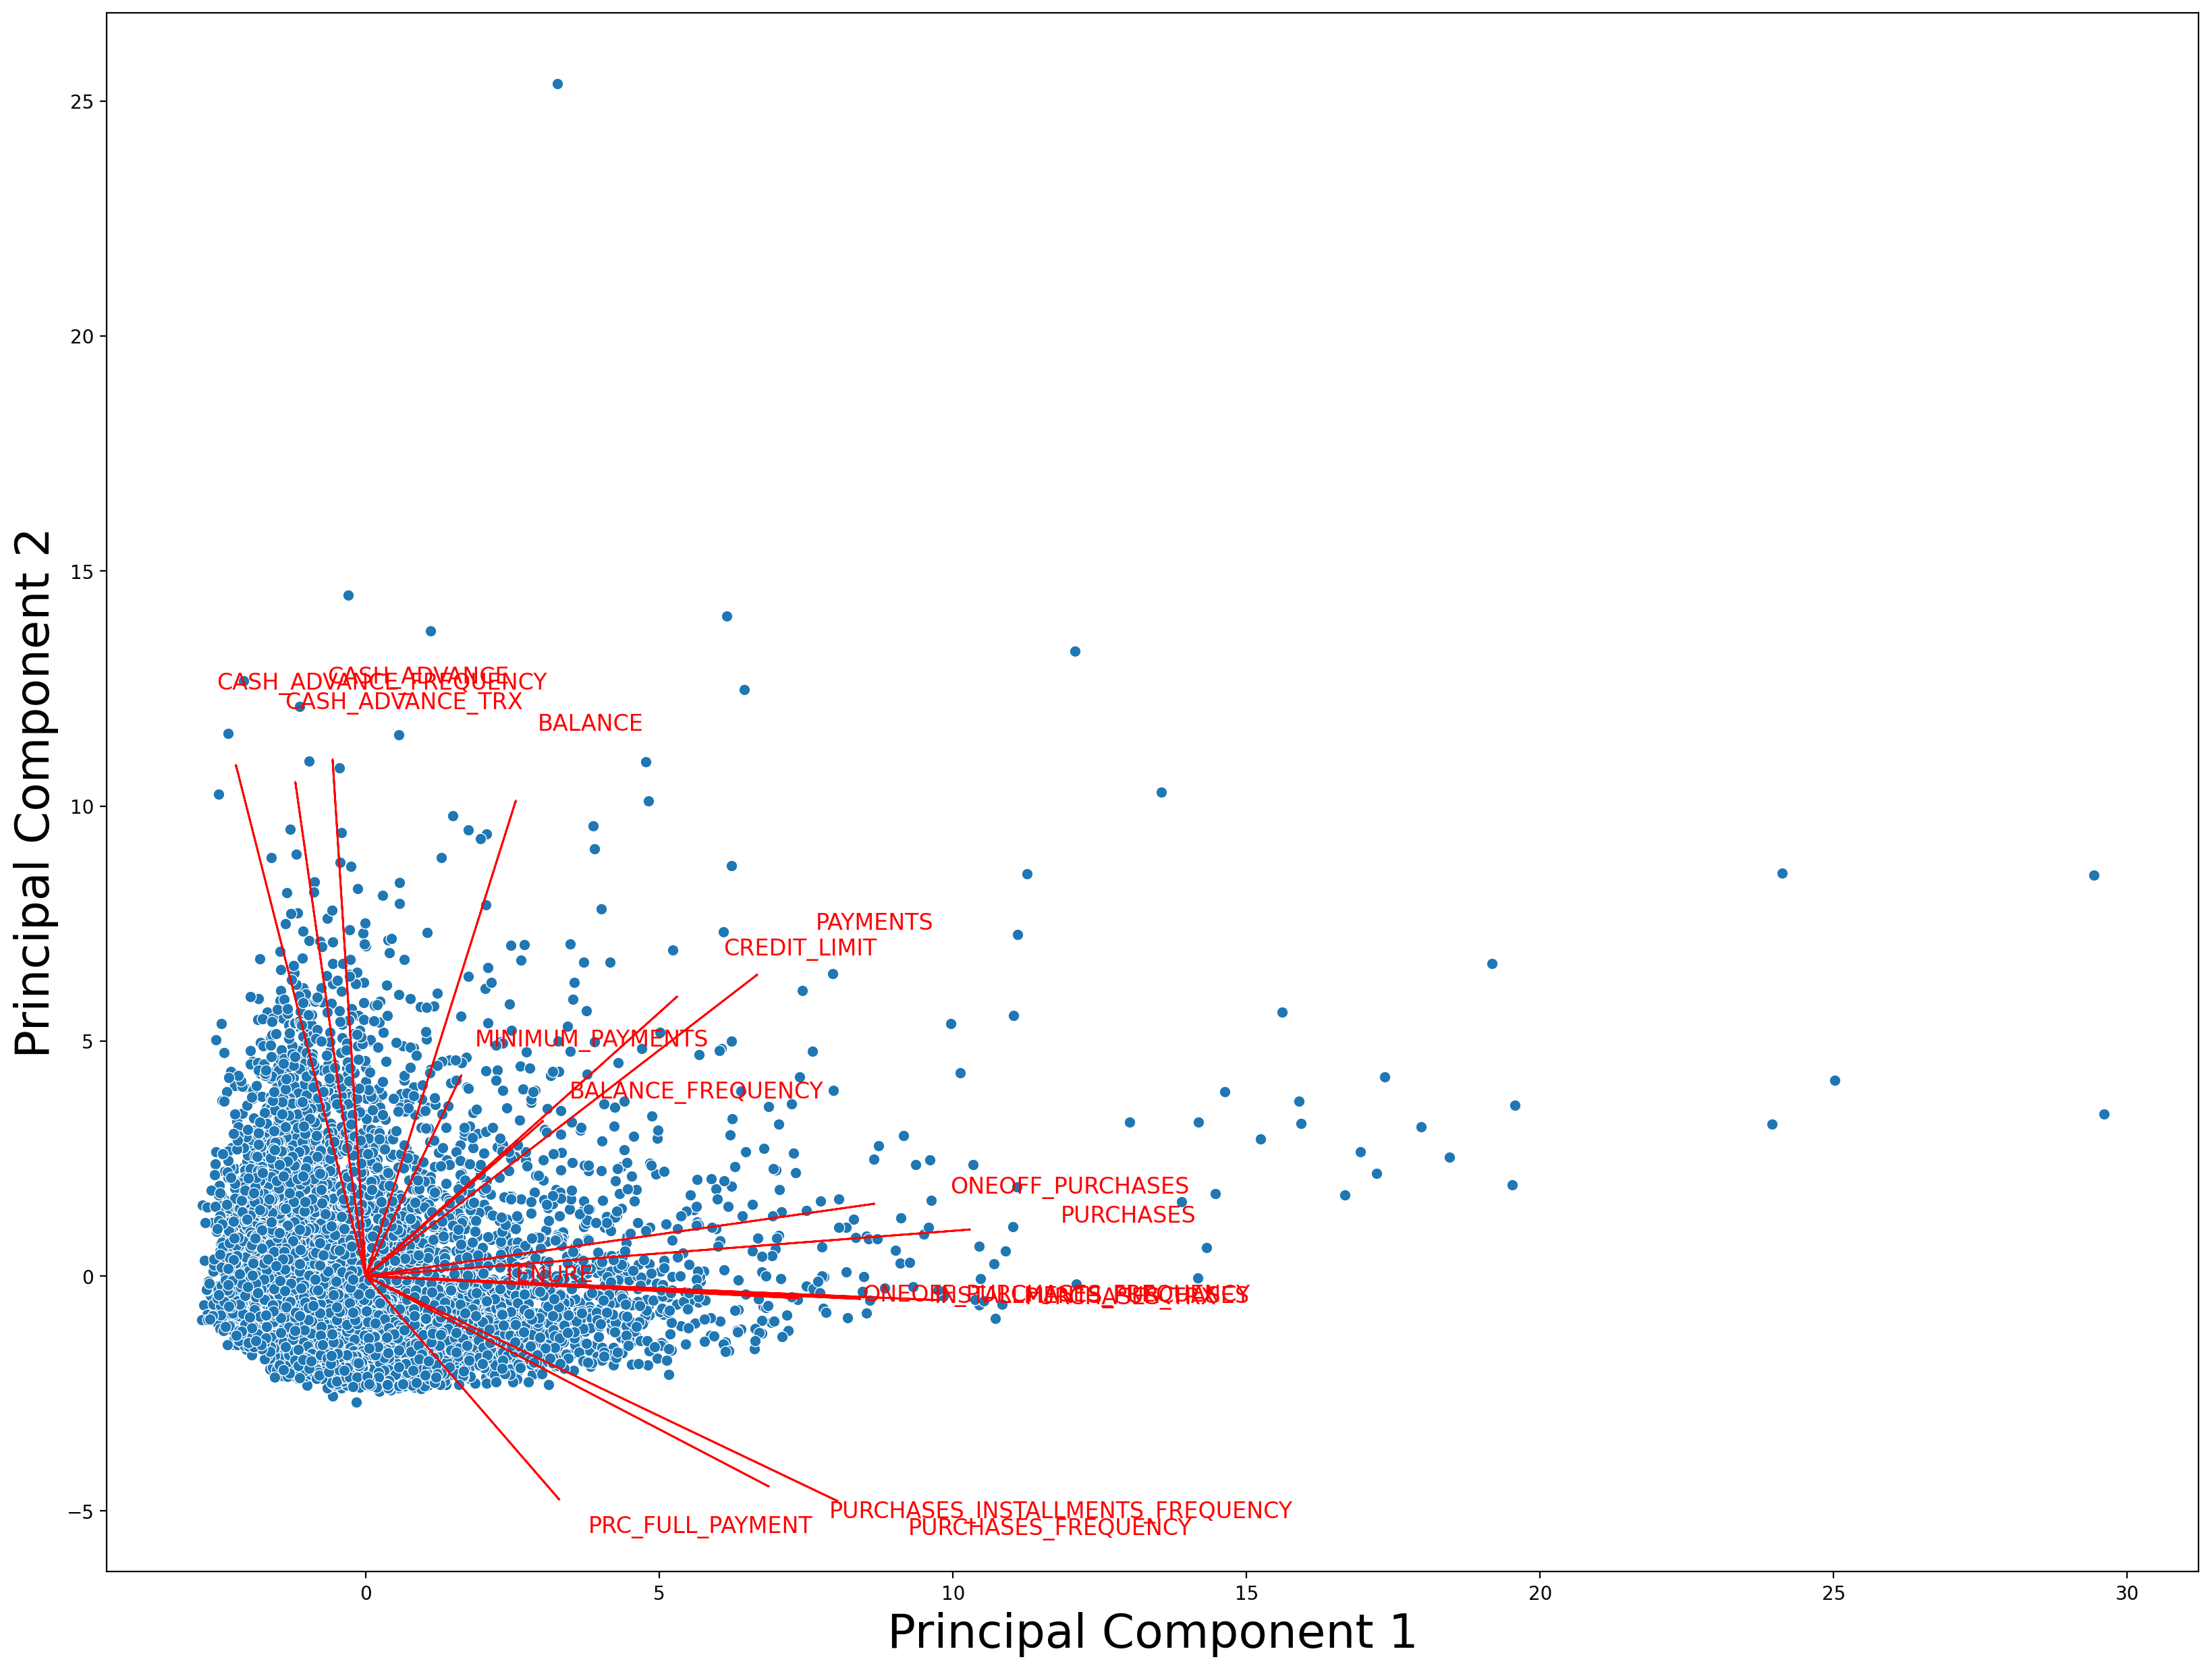

In [234]:
# BIPLOT

# Create matplot figure
plt.figure(figsize = (20,15), dpi = 200)

# Scatterplot of Principal Components
sns.scatterplot(x = 'PC1', y = 'PC2', data = pf)

# For loop created for the visualization of loading vectors
for i in range(0,17):
    x = 25 * loadings['phi1'].iloc[i]
    y = 25 * loadings['phi2'].iloc[i]
    plt.arrow(0,0, x,y, color = 'red')
    plt.text(1.15*x, 1.15*y, X.columns[i], fontdict ={'size' : 12, 'color' : 'red'})
    
# Some adjustments to the plot

plt.xlabel('Principal Component 1', fontdict = {'size' : 25})
plt.ylabel('Principal Component 2', fontdict = {'size' : 25})
plt.show()

**NOTE** : Needed to multiply arrow coordinates by 25, since otherwise vectors were not visible, because of the existing outliers!!!

<Axes: xlabel='PC1', ylabel='PC2'>

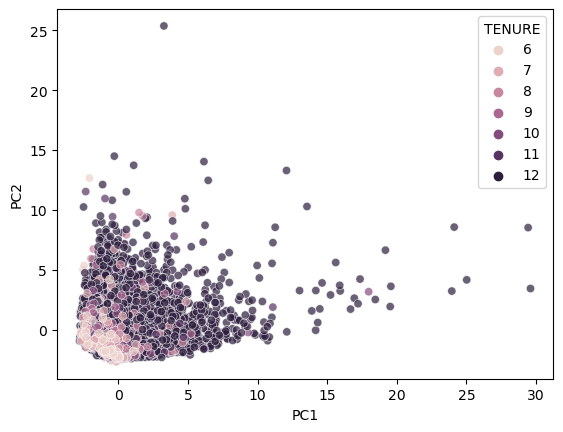

In [220]:
# PC plot by tenure categorization
sns.scatterplot(x = 'PC1', y = 'PC2', data = pf, hue = df['TENURE'], alpha = 0.7)

<Axes: xlabel='PC1', ylabel='PC2'>

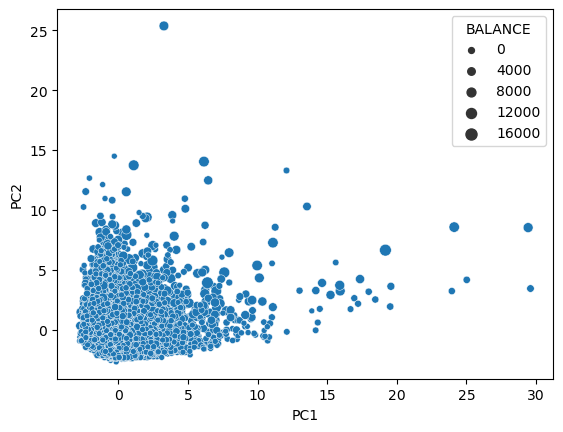

In [239]:
# PC plot by the Balance 
sns.scatterplot(x = 'PC1', y = 'PC2', data = pf, size = df['BALANCE'])

<Axes: xlabel='PC1', ylabel='PC2'>

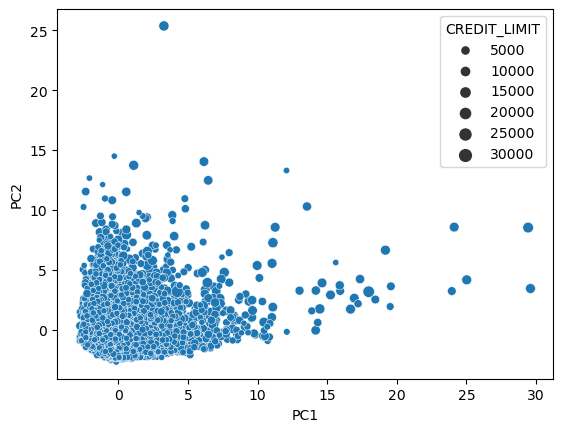

In [240]:
# PC plot by the Credit Limit 
sns.scatterplot(x = 'PC1', y = 'PC2', data = pf, size = df['CREDIT_LIMIT'])

*Above plots of principal components are not very visible (distinguishable), however outliers tend to have more of the BALANCE and CREDIT_LIMIT*